In [16]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from astropy.io import fits
from scipy.interpolate import interp1d

In [17]:
# Function for logarithmic resampling of linear integrated spectra 

def resample_spectrum(spectrum, wav_resamp):
    assert wav_resamp.min() >= spectrum[:, 0].min(), "Lmin must be >= than min spectral wavelength"
    assert wav_resamp.max() <= spectrum[:, 0].max(), "Lmax must be <= than max spectral wavelength"
    
    spline = interp1d(spectrum[:, 0], spectrum[:, 1])
    spectrum_resamp = spline(wav_resamp)
    out_spectrum = np.array([wav_resamp, spectrum_resamp]).T
    
    return out_spectrum

# 0) Darth Fader default run formats

Section to help understand exactly the details of what Darth Fader is using and adapt the products above for each of those runs.

So let me download and explore Darth Fader products.

In [3]:
ls /Users/brunomor/Work/Dedale/data/df_example_data/

clean_catalogue.fits    lines.txt               templates.fits
components.fits         properlyscaled.fits.gz  training.fits.gz
errorcurve.fits.gz      redshifts_gen1.fits     trueredshifts.fits.gz


Filename: /Users/brunomor/Work/Dedale/data/df_example_data/clean_catalogue.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       9   (2185, 2)   float64   
Filename: /Users/brunomor/Work/Dedale/data/df_example_data/components.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      10   (2142, 2860, 6)   float64   
Filename: /Users/brunomor/Work/Dedale/data/df_example_data/errorcurve.fits.gz
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       8   (2142,)   float64   
Filename: /Users/brunomor/Work/Dedale/data/df_example_data/properlyscaled.fits.gz
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       9   (2142, 2860)   float64   
Filename: /Users/brunomor/Work/Dedale/data/df_example_data/redshifts_gen1.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       8   (2860,)   float64   
Filena

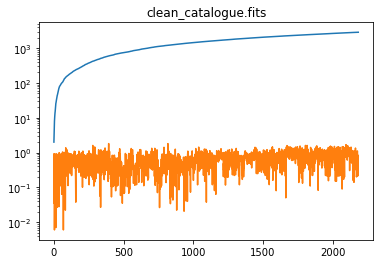

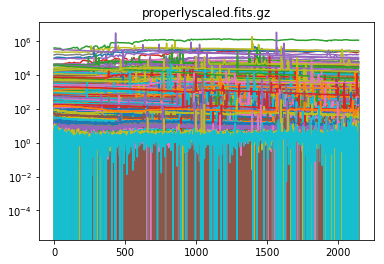

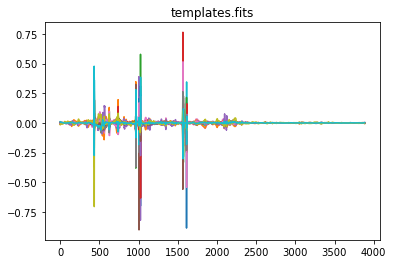

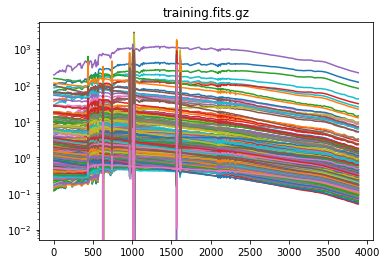

In [4]:
flist = glob.glob("/Users/brunomor/Work/Dedale/data/df_example_data/*fit*")

for fname in flist:
    hdulist = fits.open(fname)
    hdulist.info()
    if "redshifts" in fname or "components" in fname or  "errorcurve" in fname:
        continue
    templates = hdulist[0].data
    plt.figure()
    plt.title(os.path.basename(fname))
    for template in templates:
        plt.plot(template)
        if "templates" not in fname:
            plt.yscale("log")

There's not much more I can immediately do without understanding the details of the Darth Fader runs better.

In [6]:
training_df = np.load("/Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/base_data/2016-09-08_Dedale_spectroscopic_templates_euclid_run.npy")
training_df = training_df[1:]
wav = training_df[:, 0]
spectra = training_df[:, 1:]

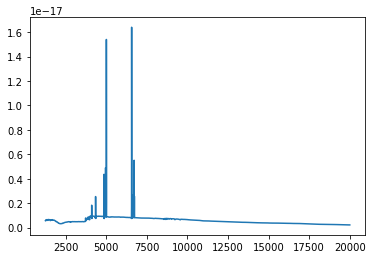

In [10]:
plt.plot(wav, spectra[:, 2]*1e-18)

I didn't understand the properlyscaled templates. This is the test data. I should really understand it.

In [ ]:
hdulist = fits.open("".join([fname for fname in flist if "properlyscaled" in fname]))

In [ ]:
hdulist.info()

In [ ]:
specs = hdulist[0].data
specs[0].shape

In [ ]:
for spec in specs[:10]:
    plt.plot(spec)

In [ ]:
cat /Users/brunomor/src/ISAP_V3.1/idl/COSMO/Galaxies/Darth_Fader/df_input_params.pro

In [ ]:
# Templates are actually eigentemplates... And what we call templates in our case
# are the training set to derive templates.

hdulist = fits.open("".join([fname for fname in flist if "template" in fname]))
hdulist.info()
spectra = hdulist[0].data
for i, spec in enumerate(spectra):
    plt.figure()
    plt.title(i)
    plt.plot(spec)

# 1) FORTH templates learned from clean + noisy data (06/10/2016)

In [3]:
folder = "/Users/brunomor/Work/Dedale/data/2016-10-04_FORTH_results/"

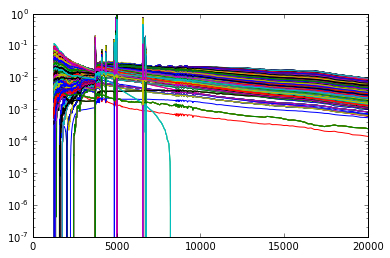

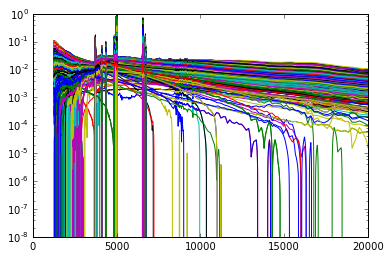

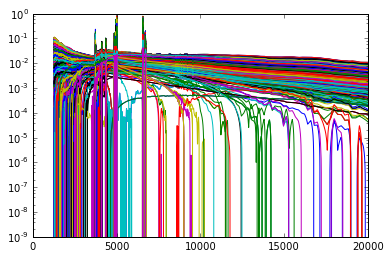

In [4]:
#cleanforth = np.loadtxt(os.path.join(folder, "Clean_Data_7000_10000_normalized.csv"),
#                        delimiter=",")

# The CLEAN file wasn't corrected by Konstantina. I will have to correct it myself.

highforth = np.loadtxt(os.path.join(folder, "reconstructed_signal_from_High_SNR_normalized_7000_10000.csv"),
                       delimiter=",")
midforth = np.loadtxt(os.path.join(folder, "reconstructed_signal_from_Mid_SNR_normalized_7000_10000.csv"),
                       delimiter=",")
lowforth = np.loadtxt(os.path.join(folder, "reconstructed_signal_from_Low_SNR_normalized_7000_10000.csv"),
                       delimiter=",")

wavforth = np.arange(1252.5, 20000, 5)

for spec in highforth.T:
    plt.plot(wavforth, spec)
    plt.yscale("log")
    #plt.ylim(0, 0.1)
    
plt.figure()
for spec in midforth.T:
    plt.plot(wavforth, spec)
    plt.yscale("log")
    #plt.ylim(0, 0.1)
    
plt.figure()
for spec in lowforth.T:
    plt.plot(wavforth, spec)
    plt.yscale("log")
    #plt.ylim(0, 0.1)

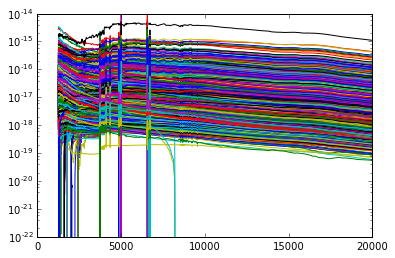

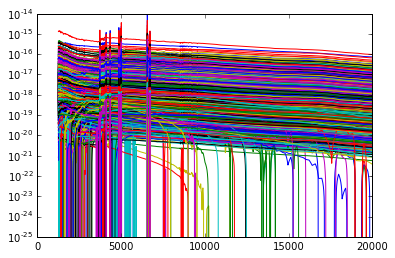

In [70]:
highforth_fluxunits = np.loadtxt(os.path.join(folder, "reconstructed_signal_from_High_SNR_7000_10000.csv"),
                       delimiter=",")

midforth_fluxunits = np.loadtxt(os.path.join(folder, "reconstructed_signal_from_Mid_SNR_7000_10000.csv"),
                       delimiter=",")

lowforth_fluxunits = np.loadtxt(os.path.join(folder, "reconstructed_signal_from_Low_SNR_7000_10000.csv"),
                       delimiter=",")

for spec in highforth_fluxunits.T:
    plt.plot(wavforth, spec)
    plt.yscale("log")
    #plt.ylim(0, 0.1)

plt.figure()
for spec in lowforth_fluxunits.T:
    plt.plot(wavforth, spec)
    plt.yscale("log")
    #plt.ylim(0, 0.1)

In [11]:
# Comparing to the same theoretical templates from Euclid simulations

euclid_clean = np.loadtxt("/Users/brunomor/Work/Dedale/data/euclid_simulations/2016-09-23_templates_euclid_run_with_noise/templates_clean.csv",
                          delimiter=",", skiprows=1)

array([  1252.5,   1257.5,   1262.5, ...,  19987.5,  19992.5,  19997.5])

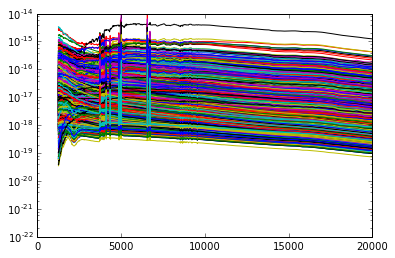

In [21]:
for spec in euclid_clean.T[7000:10000]:
    plt.plot(wavforth, spec)
    plt.yscale("log")
    plt.ylim(1e-22, 1e-14)

# 2) Preparing data for the FORTH template run (16/10/2016)

I will start with the High SNR run. If it degrades, than it's already not useful. Actually, we will very possibly have to test in terms of a metric of SNR of the observed spectrum, with degradation of results as we try to probe the lower regions.

## 2.1) The two template spectral sets (for training, these are "training" sets in DF language)

(3001, 3750)
(3001, 3750)
The selection is robust and correctly matched. Proceed to select a smaller random subsampleand rebin in log-wavelength.


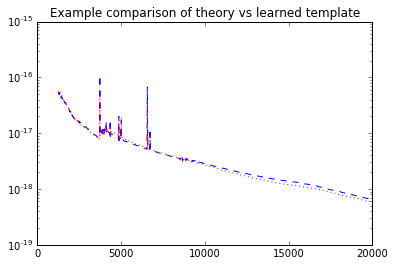

In [88]:
forth_training = highforth_fluxunits.T
euclid_training = euclid_clean.T[7000:10001]
elem = 48
plt.plot(wavforth, forth_training[elem], "b--")
plt.plot(wavforth, euclid_training[elem], "r:")
plt.title("Example comparison of theory vs learned template")
plt.yscale("log")
del elem

print(forth_training.shape)
print(euclid_training.shape)

print("The selection is robust and correctly matched. Proceed to select a smaller random subsample" +
      "and rebin in log-wavelength.")

In [112]:
np.random.seed(10)
subset = np.random.choice(3001, size=300, replace=False)

# FORTH training sample
new_wav_train = 10**np.arange(np.log10(1252.5), np.log10(19995), np.log10(np.exp(1))/5000)
new_training = [new_wav_train]

for spec in forth_training[subset]:
    spectrum = np.array([wavforth, spec]).T
    new_spec = resample_spectrum(spectrum, new_wav_train)
    new_training.append(new_spec[:, 1])

new_training = np.array(new_training).T
out_training = new_training[:, 1:]

hdu = fits.PrimaryHDU()
hdu.data = out_training.T
hdu.writeto("/Users/brunomor/Work/Dedale/analysis/DF_runs/FORTH_tempcomp_run/training_forth_learned_highsnr.fits.gz")

########################################################################################

# Euclid training sample
new_wav_train = 10**np.arange(np.log10(1252.5), np.log10(19995), np.log10(np.exp(1))/5000)
new_training = [new_wav_train]

for spec in euclid_training[subset]:
    spectrum = np.array([wavforth, spec]).T
    new_spec = resample_spectrum(spectrum, new_wav_train)
    new_training.append(new_spec[:, 1])

new_training = np.array(new_training).T
out_training = new_training[:, 1:]

hdu = fits.PrimaryHDU()
hdu.data = out_training.T
hdu.writeto("/Users/brunomor/Work/Dedale/analysis/DF_runs/FORTH_tempcomp_run/training_forth_clean.fits.gz")

## 2.2) Test spectra, errorcurves and true redshifts

I can reuse the ones from the Saclay Reference Run. It is even better to do it this way, so I can make direct comparisons.

# 3) Saclay subselection of clean spectra (06/10/2016)

In [ ]:
ls /Users/brunomor/Work/Dedale/data/2016-10-04_Saclay_spectra/

In [18]:
folder = "/Users/brunomor/Work/Dedale/data/2016-10-04_Saclay_spectra/"
ztrue = np.load(os.path.join(folder, "2016-06-20_spec_10_list_truez_corr_z1to1p8_randomset.npy"))
hdus = np.load(os.path.join(folder, "2016-06-20_spec_10_list_hdu_z1to1p8_randomset.npy"))
ids = np.load(os.path.join(folder, "2016-06-20_spec_10_list_id_corr_z1to1p8_randomset.npy"))

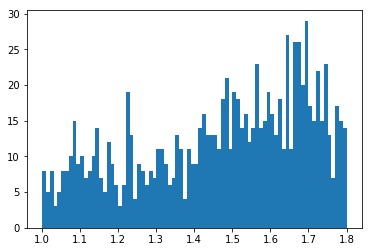

In [19]:
_ = plt.hist(ztrue, bins=np.arange(1.0, 1.81, 0.01))

In [20]:
spectra = fits.getdata(os.path.join(folder, "2016-06-20_all_filters_corrected_spectra_spec_10_rebin_5A_all_z1to1p8_randomset.fits"))

In [21]:
wav = spectra[0]

In [ ]:
checks = np.random.randint(1, 1000, size=15)

In [ ]:
for spec in spectra[1:]:
    plt.plot(wav, 1e-16*spec)
    plt.yscale("log")

# 4) Preparing data for the Saclay run

## 4.1) The template spectra for training

In [4]:
training = np.load("/Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/base_data/2016-09-08_Dedale_spectroscopic_templates_euclid_run.npy")
hdus = training[0][1:].astype("int")
wav = training[1:, 0]
spectra = training[1:, 1:].T
new_wav_train = 10**np.arange(np.log10(1252.5), np.log10(19995), np.log10(np.exp(1))/5000)

new_training = [new_wav_train]
for spec in spectra:
    spectrum = np.array([wav, spec]).T
    new_spec = resample_spectrum(spectrum, new_wav_train)
    new_training.append(new_spec[:, 1])

new_training = np.array(new_training).T
out_training = new_training[:, 1:301]

hdu = fits.PrimaryHDU()
hdu.data = out_training.T
hdu.writeto("/Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/formatted_data/training_euclid_small.fits.gz")

## 4.2) The test spectra for the full run

In [ ]:
hdulist = fits.open("/Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/base_data/2016-06-20_all_filters_corrected_spectra_spec_10_rebin_5A_all_z1to1p8_randomset.fits")
hdulist.info()
wav = hdulist[0].data[0]
spectra = hdulist[0].data[1:]
for spec in spectra[:100]:
    plt.plot(wav, spec)

new_wav = 10**np.arange(np.log10(3000), np.log10(19500), np.log10(np.exp(1))/5000)

new_testing = [new_wav]
for spec in spectra:
    spectrum = np.array([wav, spec]).T
    new_spec = resample_spectrum(spectrum, new_wav)
    new_testing.append(new_spec[:, 1])

new_testing = np.array(new_testing).T
out_testing = new_testing[:, 1:]

hdu = fits.PrimaryHDU()
hdu.data = out_testing.T
hdu.writeto("/Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/formatted_data/testing_euclid.fits.gz")

## 4.3) Preparing errorcurve and ztrue files for the full run

In [ ]:
noise = 1e-4*np.ones(len(new_wav))
plt.plot(new_wav, noise)
hdu = fits.PrimaryHDU()
hdu.data = noise
hdu.writeto("/Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/formatted_data/errorcurve_constant.fits.gz")

In [ ]:
hdulist = fits.open("/Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/formatted_data/errorcurve_constant.fits.gz")
hdulist.info()

In [ ]:
hdu = fits.PrimaryHDU()
hdu.data = ztrue
hdu.writeto("/Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/formatted_data/ztrue_saclay.fits.gz")

## 4.4) Publication quality plots and analysis

In [116]:
ztrue = fits.getdata("/Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/output_data/ztrue_saclay.fits.gz")
ztest1 = fits.getdata("/Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/output_data/redshifts_test1.fits")
ztest2 = fits.getdata("/Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/output_data/redshifts_test2.fits")
ztest3 = fits.getdata("/Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/output_data/redshifts_test3.fits")
ztest4 = fits.getdata("/Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/output_data/redshifts_test4.fits")

Percent |dz| > 0.001*(1 + z): 17.30
Percent |dz| > 0.001*(1 + z): 16.80
Percent |dz| > 0.001*(1 + z): 17.30
Percent |dz| > 0.001*(1 + z): 15.70


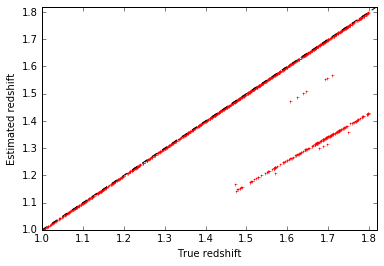

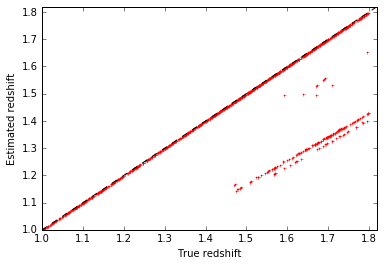

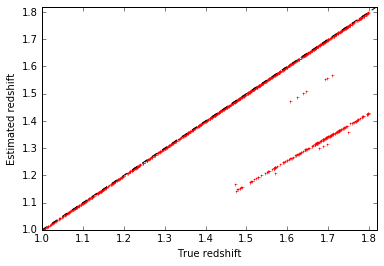

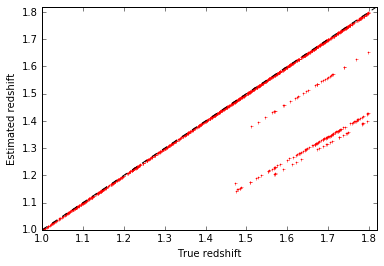

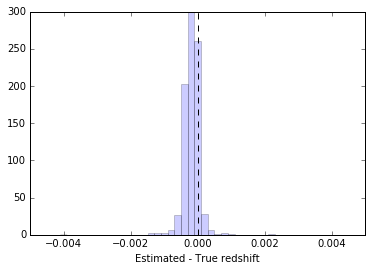

In [163]:
zfill = np.arange(1.0, 2.0, 0.01)
for i, zgen in enumerate([ztest1, ztest2, ztest3, ztest4]):
    plt.figure()
    plt.plot(ztrue, zgen, "r+", markersize=3)
    plt.plot(np.arange(1, 2, 0.01), np.arange(1, 2, 0.01), "k--")
    plt.xlim(1, 1.82)
    plt.ylim(1, 1.82)
    plt.xlabel("True redshift")
    plt.ylabel("Estimated redshift")
    """
    plt.figure()
    plt.plot(ztrue, zgen-ztrue, "b.", markersize=2)
    plt.axhline(c="red")
    plt.xlim(1, 2)
    plt.xlabel("ztrue")
    plt.ylabel("zgen - ztrue")
    """
    if i == 3:
        plt.savefig("/Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/output_data/redshifts_Saclay_DF.pdf")

plt.figure()
for i, zgen in enumerate([ztest1, ztest2, ztest3, ztest4]):
    print("Percent |dz| > 0.001*(1 + z): %.2f" % (100*np.sum(np.absolute(zgen - ztrue) > 0.001*ztrue)/len(ztrue)))
    if i < 3:
        continue
    plt.hist(zgen-ztrue, bins=np.arange(-0.0041, 0.0043, 0.0002), alpha=0.2)
    plt.axvline(c="black", linestyle="--")
    plt.xlabel("Estimated - True redshift")
    plt.savefig("/Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/output_data/zhist_Saclay_DF.pdf")

    


# 5) Making FORTH publication-quality plots

Percent |dz| > 0.001*(1 + z): 15.90
Percent |dz| > 0.001*(1 + z): 10.30


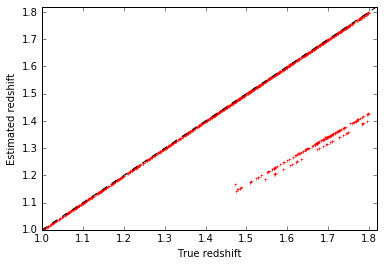

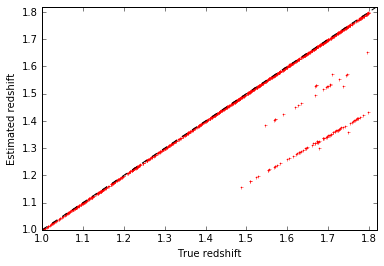

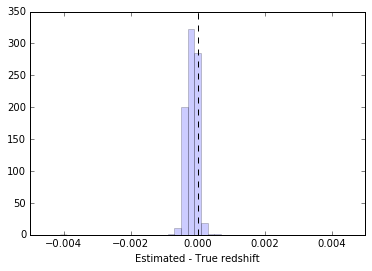

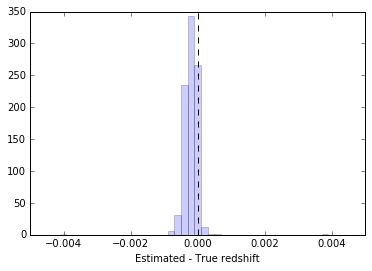

In [167]:
ztrue = fits.getdata("/Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/output_data/ztrue_saclay.fits.gz")
z_df = fits.getdata("/Users/brunomor/Work/Dedale/analysis/DF_runs/FORTH_tempcomp_run/redshifts_forth_clean.fits")
z_learn = fits.getdata("/Users/brunomor/Work/Dedale/analysis/DF_runs/FORTH_tempcomp_run/redshifts_forth_learned.fits")

for i, zgen in enumerate([z_df, z_learn]):
    plt.figure()
    plt.plot(ztrue, zgen, "r+", markersize=3)
    plt.plot(np.arange(1, 2, 0.01), np.arange(1, 2, 0.01), "k--")
    plt.xlim(1, 1.82)
    plt.ylim(1, 1.82)
    plt.xlabel("True redshift")
    plt.ylabel("Estimated redshift")
    """
    plt.figure()
    plt.plot(ztrue, zgen-ztrue, "b.", markersize=2)
    plt.axhline(c="red")
    plt.xlim(1, 2)
    plt.xlabel("ztrue")
    plt.ylabel("zgen - ztrue")
    """
    if i == 0:
        plt.savefig("/Users/brunomor/Work/Dedale/analysis/DF_runs/FORTH_tempcomp_run/redshifts_FORTH_DF.pdf")
    elif i == 1:
        plt.savefig("/Users/brunomor/Work/Dedale/analysis/DF_runs/FORTH_tempcomp_run/redshifts_FORTH_learned.pdf")
                          
plt.figure()
for i, zgen in enumerate([z_df, z_learn]):
    plt.figure()
    plt.hist(zgen-ztrue, bins=np.arange(-0.0041, 0.0043, 0.0002), alpha=0.2)
    plt.axvline(c="black", linestyle="--")
    plt.xlabel("Estimated - True redshift")
    if i == 0:
        plt.savefig("/Users/brunomor/Work/Dedale/analysis/DF_runs/FORTH_tempcomp_run/zhist_FORTH_DF.pdf")
    if i == 1:
        plt.savefig("/Users/brunomor/Work/Dedale/analysis/DF_runs/FORTH_tempcomp_run/zhist_FORTH_learned.pdf")

    
    print("Percent |dz| > 0.001*(1 + z): %.2f" % (100*np.sum(np.absolute(zgen - ztrue) > 0.001*ztrue)/len(ztrue)))